In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
from datetime import datetime, timedelta


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

In [10]:
date_list = []
prcp_list = []
temp_list = []
for instance in session.query(Measurement):
#     print(instance.date,instance.prcp)
    date_list.append(instance.date)
    prcp_list.append(instance.prcp)
    temp_list.append(instance.tobs)

In [11]:
# temp_list

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# print(year_data)
# Calculate the date 1 year ago from today
# now = dt.datetime.now()
# todays_date = now.strftime("%Y-%m-%d")
# year_from_now = todays_date - 
max_date = pd.read_sql("select date from measurement",conn)
max_date = max_date.values.tolist()
max_date = max(max_date)
max_date = ''.join(max_date)
# print(max_date)
year,month,day = max_date.split('-')
# print(f"year:{year},month{month},day{day}")
days_to_subtract = 365
year_from_max = datetime(int(year),int(month),int(day)) - timedelta(days=days_to_subtract)
# print(year_from_max)
# Perform a query to retrieve the data and precipitation scores
year_data = pd.read_sql(f"select * from measurement where date >= '{year_from_max}'",conn)
# year_data = pd.read_sql(f"select * from measurement where date >= '2017-06-04'",conn)
# # Save the query results as a Pandas DataFrame and set the index to the date column
# print(year_data)
year_data = year_data[["date","prcp"]]
year_data = year_data.set_index("date")
# Sort the dataframe by date
year_data = year_data.sort_values("date")
# year_data = year_data.reset_index()
# year_data = year_data[[date,"prcp"]]
# year_data
year_data.head(20)
# len(year_data)

,prcp
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45
2016-08-24,1.22
2016-08-25,0.08
2016-08-25,0.00


C:\Users\nsita\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


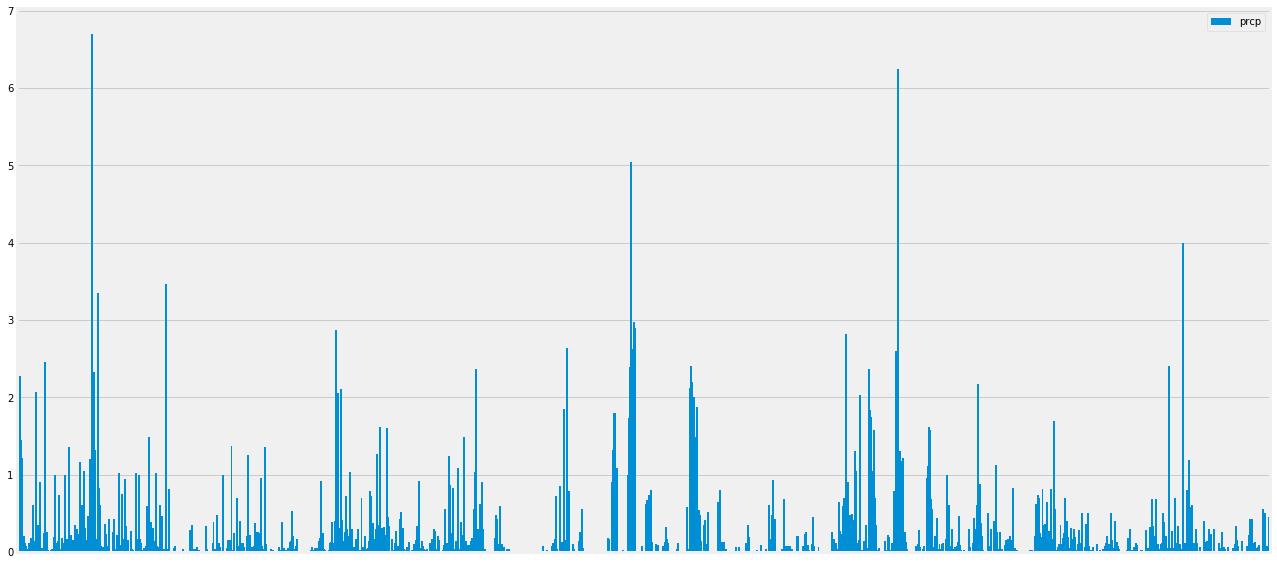

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
year_data.plot(kind="bar", figsize=(20,10), width = 3.5)
# plt.ylim(0,7)
# Rotate the xticks for the dates
plt.xticks(rotation=90)
# plt.axis('off')
# ax1 = plt.axes()
x_axis = plt.axes().axes.get_xaxis()
x_axis.set_visible(False)
plt.xlabel("date")
plt.savefig("precipitationgraph.png")
plt.show()

|![precipitation](Images/precipitation.png)

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_data.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# How many stations are available in this dataset?
all_data = pd.read_sql("select * from measurement", conn)
nunique = all_data.nunique()
nunique = nunique.to_dict()
nunique['station']

9

In [16]:
# What are the most active stations?
# List the stations and the counts in descending order.
most_active_station = all_data.groupby("station").count()

most_active_station_dict = most_active_station["id"].sort_values(ascending = False)
most_active_station["id"].sort_values(ascending = False)
most_active_station_dict = pd.DataFrame(most_active_station_dict)
most_active_station_dict = most_active_station_dict.to_dict()
most_active_station_dict

{'id': {'USC00519281': 2772,
  'USC00519397': 2724,
  'USC00513117': 2709,
  'USC00519523': 2669,
  'USC00516128': 2612,
  'USC00514830': 2202,
  'USC00511918': 1979,
  'USC00517948': 1372,
  'USC00518838': 511}}

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
USC00519281 = pd.read_sql("select * from measurement where station = 'USC00519281'",conn)
USC00519281
USC00519281 = USC00519281[["tobs"]]
USC00519281_max = USC00519281.max().tolist()
USC00519281_min = USC00519281.min().tolist()
USC00519281_avg = USC00519281.mean().tolist()

to_list = (USC00519281_min,USC00519281_max,USC00519281_avg)
to_list
# records = []
# for value in to_list:
#     print(items)

([54.0], [85.0], [71.66378066378067])

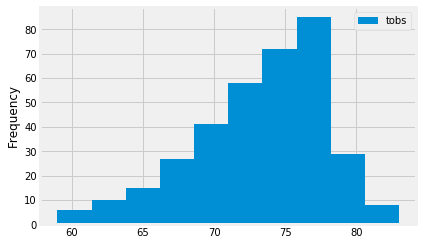

In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_number_temp = all_data[["station","tobs"]]
highest_number_temp = highest_number_temp.groupby("station").count()
highest_number_temp = highest_number_temp.sort_values(by="tobs",ascending=False)
highest_number_temp
USC00519281_tobs = pd.read_sql(f"select date,tobs from measurement where station = 'USC00519281' and date >= '{year_from_max}'",conn)
# USC00519281_tobs
USC00519281_tobs_dict = USC00519281_tobs.to_dict(orient="records")
USC00519281_tobs_dict
USC00519281_tobs.plot(kind='hist')

In [19]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
#     tmin = session.query(func.min(Measurement.tobs)).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
#     tavg = session.query(func.avg(Measurement.tobs)).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
#     tmax = session.query(func.max(Measurement.tobs)).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    """TMIN, TAVG, and TMAX for a list of dates.
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    toreturn = session.query(\
    func.min(Measurement.tobs),\
    func.avg(Measurement.tobs),\
    func.max(Measurement.tobs)).\
    filter(Measurement.date >=start_date).\
    filter(Measurement.date <=end_date).\
    all()
#     print(toreturn)
#     toreturn = toreturn[0]
#     TMIN = toreturn[0]
#     TAVE = toreturn[1]
#     TMAX = toreturn[2]
# #     print(TMIN, TAVE, TMAX)
    return toreturn
print(calc_temps('2012-02-28', '2012-03-05'))


[(62.0, 69.57142857142857, 74.0)]


In [20]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(max_date)
max_date = str(max_date)
year_from_max = str(year_from_max.date())
to_bar_chart = calc_temps(year_from_max,max_date)
print(to_bar_chart)

2017-08-23
[(58.0, 74.59058295964125, 87.0)]


   Trip Avg Temp
0      74.590583


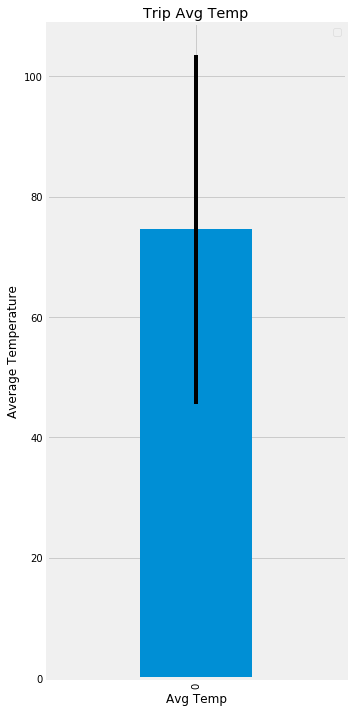

In [21]:

convert_to_individual = to_bar_chart[0]
TMIN = convert_to_individual[0]
TAVG = convert_to_individual[1]
TMAX = convert_to_individual[2]

tavg_frame = pd.DataFrame({"Trip Avg Temp":[TAVG]})
print(tavg_frame)
tavg_frame.plot(kind="bar",width=.3,yerr=(TMAX-TMIN),figsize=(5,10))
# print(TMIN,TAVE,TMAX)
# Plot the results from your previous query as a bar chart. 
plt.title("Trip Avg Temp")
plt.legend('')
# plt.xticks(ticks='')
plt.xlabel("Avg Temp")
# plt.bar(x="",height=TAVG,width=.01,yerr=(TMAX-TMIN))
# plt.figure(figsize=(10,4))
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
plt.ylabel("Average Temperature")
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.tight_layout()
plt.savefig("BarChart.jpg")
plt.show()



In [22]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = '2012-02-28'
end_date = '2012-03-05'

# rainfall_per_station = session.query(Measurement.station,\
#                                     func.sum(Measurement.prcp)).\
#                                     filter(Measurement.date >=start_date).\
#                                     filter(Measurement.date <=end_date).\
#                                     group_by(Measurement.station).\
#                                     order_by(func.sum(Measurement.prcp).desc()).\
#                                     all()


measurement_table = pd.read_sql(f"select * from measurement where date between '{start_date}' and '{end_date}'", conn)
station_table = pd.read_sql('select * from station', conn)


# rainfall_per_station
# rainfall_per_station
measurement_table = measurement_table[["station","prcp"]]
station_table = station_table[["station","name","latitude","longitude","elevation"]]
measurement_table_grouped = measurement_table.groupby("station").sum()
measurement_table_grouped = measurement_table_grouped.sort_values(by="prcp", ascending=False)

# print(measurement_table_grouped.head())
# print(station_table.head())
measurement_table_grouped

station_table
measurement_station_merged = measurement_table_grouped.merge(station_table, how='inner',on="station")
measurement_station_merged = measurement_station_merged[["station","name","latitude","longitude","elevation","prcp"]]
measurement_station_merged_dict = measurement_station_merged.to_dict(orient='records')
measurement_station_merged_dict

[{'station': 'USC00519281',
  'name': 'WAIHEE 837.5, HI US',
  'latitude': 21.45167,
  'longitude': -157.84888999999998,
  'elevation': 32.9,
  'prcp': 11.08},
 {'station': 'USC00516128',
  'name': 'MANOA LYON ARBO 785.2, HI US',
  'latitude': 21.3331,
  'longitude': -157.8025,
  'elevation': 152.4,
  'prcp': 10.32},
 {'station': 'USC00513117',
  'name': 'KANEOHE 838.1, HI US',
  'latitude': 21.4234,
  'longitude': -157.8015,
  'elevation': 14.6,
  'prcp': 5.79},
 {'station': 'USC00518838',
  'name': 'UPPER WAHIAWA 874.3, HI US',
  'latitude': 21.4992,
  'longitude': -158.0111,
  'elevation': 306.6,
  'prcp': 3.8400000000000003},
 {'station': 'USC00519523',
  'name': 'WAIMANALO EXPERIMENTAL FARM, HI US',
  'latitude': 21.33556,
  'longitude': -157.71139,
  'elevation': 19.5,
  'prcp': 2.92},
 {'station': 'USC00519397',
  'name': 'WAIKIKI 717.2, HI US',
  'latitude': 21.2716,
  'longitude': -157.8168,
  'elevation': 3.0,
  'prcp': 1.1800000000000002},
 {'station': 'USC00511918',
  'name

## Optional Challenge Assignment

In [23]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [95]:
# calculate the daily normals for your trip
trip_time = [start_date,end_date]
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
date_range = pd.date_range(start_date,end_date)
# Use the start and end date to create a range of dates
to_plot = []
for dt in date_range:
#     dt_mod = datetime(dt.date())
#     dt_month = dt_mod.month()
#     print(dt)
#     print(dt.month)
#     print(dt.day)
    if dt.month <= 9:
        if dt.day <= 9:
            date_to_search = str("0") + str(dt.month) + '-0' + str(dt.day)
        else:
            date_to_search = str("0") + str(dt.month) + '-' + str(dt.day)
        
    print(date_to_search)
    to_append = daily_normals(date_to_search)
    to_plot.append(to_append)
# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date
# date_range
# daily_normals('2-28')
to_plot

02-28
02-29
03-01
03-02
03-03
03-04
03-05


[[(65.0, 70.65517241379311, 80.0)],
 [(67.0, 71.73333333333333, 79.0)],
 [(64.0, 70.0327868852459, 76.0)],
 [(61.0, 70.36666666666666, 78.0)],
 [(60.0, 70.06896551724138, 78.0)],
 [(57.0, 69.27272727272727, 77.0)],
 [(60.0, 67.89090909090909, 76.0)]]

Text(0, 0.5, 'Temp')

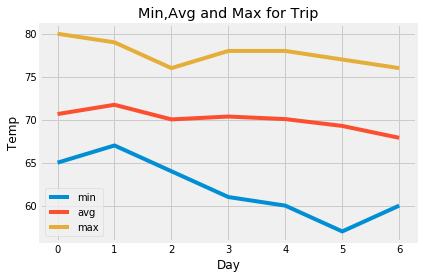

In [111]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
to_plot_df = []
for items in to_plot:
    to_plot_df.append(*items)
to_plot_df = pd.DataFrame(to_plot_df,columns=["min","avg","max"])
to_plot_df.plot(stacked=False)
plt.title("Min,Avg and Max for Trip")
plt.xlabel("Day")
plt.ylabel("Temp")

In [94]:
# Plot the daily normals as an area plot with `stacked=False`
